In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas.util.testing as tm

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
data1 = pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_08.csv")
data2 =pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_18.csv")

In [3]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
data2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [6]:
#checking for duplicates in dataframe
print(data1.duplicated().sum())
print(data2.duplicated().sum())

25
0


In [7]:
# removing duplicates
data1.drop_duplicates(inplace = True)

In [8]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [9]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())

0
0


Hanling missing variables

In [10]:
mis1 = data1.isnull().sum()
mis1 = mis1.drop(mis1[mis1== 0].index).sort_values(ascending = False)[:30]
missing1 = pd.DataFrame({'Missing Value':mis1})
missing1

,Missing Value
Greenhouse Gas Score,180
Unadj Cmb MPG,180
Cmb MPG,180
Hwy MPG,180
City MPG,180
FE Calc Appr,180
Trans,180
Cyl,180
Drive,74


Text(0.5, 1.0, ' Missing Data by Featue')

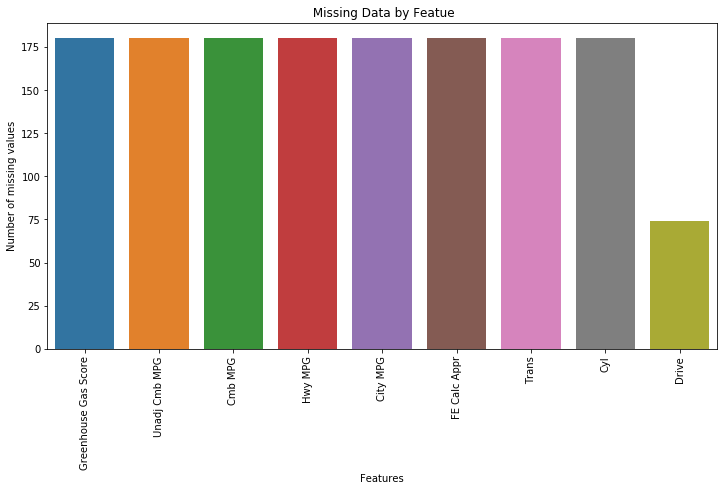

In [11]:
#ploting missing values

f, ax = plt.subplots(figsize = (12,6))
plt.xticks(rotation='90')

sns.barplot(x= mis1.index , y = mis1)

plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title(" Missing Data by Featue")

In [12]:
mis2 = data2.isnull().sum()
mis2 = mis2.drop(mis2[mis2== 0].index).sort_values(ascending = False)[:30]
missing2 = pd.DataFrame({'Missing Value':mis2})

missing2

,Missing Value
Cyl,2
Displ,2


In [13]:
# droping unwanted columns 
data_08 = data1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis =1)
data_18 = data2.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis =1)

In [14]:
# rename 2018 coloumn 'cert region' with 'sales region'
data_08 = data_08.rename(columns = {'Sales Area' : 'Cert_region'})
data_18 = data_18.rename(columns = {'Cert Region' : 'Cert_region'})

In [15]:
#For consistency, only compare cars certified by California standards.

data_08 = data_08.query('Cert_region == "CA"')
data_18 = data_18.query('Cert_region == "CA"')

Handling of missing values

In [16]:
# drop the rows that have a missing value, as the missing values are so less
data_08.dropna(inplace = True)
data_18.dropna(inplace = True)

In [17]:
data_18.isnull().sum()


Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Cert_region             0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

In [18]:
data_08['Cyl'].value_counts()

(6 cyl)     417
(4 cyl)     287
(8 cyl)     207
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: Cyl, dtype: int64

In [19]:
#extract the values, drop cyl from data
data_08['Cyl'] = data_08['Cyl'].str.extract('(\d+)').astype(int)

In [20]:
data_18['Cyl'] = data_18['Cyl'].astype(int)

In [21]:
data_18['Cyl'].value_counts()

4     366
6     247
8     154
3      18
12      9
5       2
16      1
Name: Cyl, dtype: int64

In [22]:
# airpollution score have a string value in order 6/4 , so we need to split that up as 
# so all vehicles with more than one fuel type, or hybrids
#will have a string that holds two values - one for each


In [23]:
data_08['Fuel'].value_counts()

Gasoline       1004
CNG               1
ethanol/gas       1
Name: Fuel, dtype: int64

In [24]:
data_18['Fuel'].value_counts()

Gasoline                740
Ethanol/Gas              26
Diesel                   19
Gasoline/Electricity     12
Name: Fuel, dtype: int64

In [25]:
hb_08 = data_08[data_08['Fuel'].str.contains('/')]
hb_08


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [26]:
hb_18 = data_18[data_18['Fuel'].str.contains('/')]
hb_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No


In [27]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()
df2 = hb_08.copy()

In [28]:
# columns to split by "/"

splitcol = ['Fuel', 'Air Pollution Score','City MPG','Hwy MPG' ,'Cmb MPG','Greenhouse Gas Score']

for c in splitcol:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [29]:
newrows = df2.append(df1)

In [30]:
# drop the original hybrid rows
data_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
data_08 = data_08.append(newrows, ignore_index=True)

In [31]:
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [32]:
# create two copies of the 2008 hybrids dataframe
dfr1 = hb_18.copy()
dfr2 = hb_18.copy()

In [33]:
# columns to split by "/"

splitcolu = ['Fuel','City MPG','Hwy MPG' ,'Cmb MPG',  ]

for c in splitcolu:
    dfr1[c] = dfr1[c].apply(lambda x: x.split("/")[0])
    
    dfr2[c] = dfr2[c].apply(lambda x: x.split("/")[1])

In [34]:
dfr2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,CA,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,CA,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,CA,large car,5,18,28,22,4,No


In [35]:
newrows = dfr2.append(dfr1)

In [36]:
# drop the original hybrid rows
data_18.drop(hb_18.index, inplace=True)

# add in our newly separated rows
data_18 = data_18.append(newrows, ignore_index=True)

In [37]:
data_08['Air Pollution Score'] = data_08['Air Pollution Score'].astype(float)
data_18['Air Pollution Score'] = data_18['Air Pollution Score'].astype(float)

Converting columns to desired data form 

In [38]:
mpg_col = ['City MPG', 'Hwy MPG' , 'Cmb MPG']

for c in mpg_col:
    data_08[c] = data_08[c].astype(float)
    data_18[c] = data_18[c].astype(float)

In [39]:
data_08['Greenhouse Gas Score'] = data_08['Greenhouse Gas Score'].astype(int)

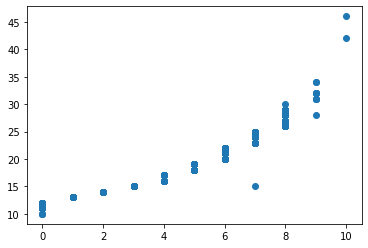

In [40]:
fig , ax = plt.subplots()
ax.scatter(data_08['Greenhouse Gas Score'], y = data_08['Cmb MPG'])


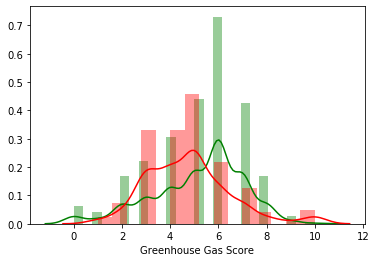

In [41]:
#data_08['Greenhouse Gas Score'].plot(kind = 'hist')
sns.distplot( data_08['Greenhouse Gas Score'], color = 'g')
sns.distplot( data_18['Greenhouse Gas Score'], color = 'r')
#data_08['Greenhouse Gas Score']

Using visaulisation to derive further insights

In [42]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 835 non-null    object 
 1   Displ                 835 non-null    float64
 2   Cyl                   835 non-null    int32  
 3   Trans                 835 non-null    object 
 4   Drive                 835 non-null    object 
 5   Fuel                  835 non-null    object 
 6   Cert_region           835 non-null    object 
 7   Veh Class             835 non-null    object 
 8   Air Pollution Score   835 non-null    float64
 9   City MPG              835 non-null    float64
 10  Hwy MPG               835 non-null    float64
 11  Cmb MPG               835 non-null    float64
 12  Greenhouse Gas Score  835 non-null    int64  
 13  SmartWay              835 non-null    object 
dtypes: float64(5), int32(1), int64(1), object(7)
memory usage: 88.2+ KB


In [43]:
data_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1007 non-null   object 
 1   Displ                 1007 non-null   float64
 2   Cyl                   1007 non-null   int32  
 3   Trans                 1007 non-null   object 
 4   Drive                 1007 non-null   object 
 5   Fuel                  1007 non-null   object 
 6   Cert_region           1007 non-null   object 
 7   Veh Class             1007 non-null   object 
 8   Air Pollution Score   1007 non-null   float64
 9   City MPG              1007 non-null   float64
 10  Hwy MPG               1007 non-null   float64
 11  Cmb MPG               1007 non-null   float64
 12  Greenhouse Gas Score  1007 non-null   int32  
 13  SmartWay              1007 non-null   object 
dtypes: float64(5), int32(2), object(7)
memory usage: 102.4+ KB


Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [44]:
data_08['Fuel'].value_counts()

Gasoline    1004
ethanol        1
gas            1
CNG            1
Name: Fuel, dtype: int64

In [45]:
data_18['Fuel'].value_counts()

Gasoline       752
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: Fuel, dtype: int64

In year 2008, alternative fuel were ethanol and CNG, wheras in 2018 it was Ethanol and Electricity

In [46]:
ax = data_08.query('Fuel in ["CNG","ethanol"]').Model.nunique()
ax

2

In [47]:
bx = data_18.query('Fuel in ["Ethanol","Electricity"]').Model.nunique()
bx

26

Text(0.5, 1.0, 'No of vehicles with alternative fuel')

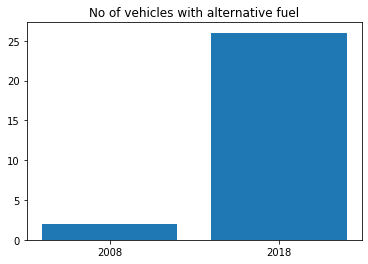

In [48]:
plt.bar(['2008' , '2018'] , [ax,bx])
plt.title('No of vehicles with alternative fuel')

     How much have vehicle classes improved in fuel economy (increased in mpg)?

In [49]:
eco_08 = data_08.groupby('Veh Class')['Cmb MPG'].mean()

In [50]:
eco_08.head()

Veh Class
SUV            18.472028
large car      18.509091
midsize car    21.571429
minivan        19.117647
pickup         16.388889
Name: Cmb MPG, dtype: float64

In [51]:
eco_18 = data_18.groupby('Veh Class')['Cmb MPG'].mean()
eco_18.head()

Veh Class
large car      23.409091
midsize car    27.827338
minivan        20.800000
pickup         18.589744
small SUV      24.074074
Name: Cmb MPG, dtype: float64

In [52]:
eco = eco_18 - eco_08
eco

Veh Class
SUV                     NaN
large car          4.900000
midsize car        6.255910
minivan            1.682353
pickup             2.200855
small SUV               NaN
small car          4.358922
special purpose         NaN
standard SUV            NaN
station wagon      5.261905
van                     NaN
Name: Cmb MPG, dtype: float64

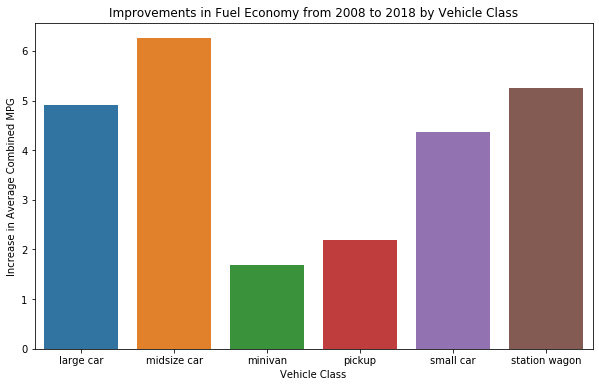

In [53]:
eco.dropna(inplace = True)
plt.figure(figsize = (10,6))
ax = sns.barplot(eco.index,eco)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');
plt.show()

 What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [54]:
# groupby smartway
smart = data_08.groupby("SmartWay")['Cmb MPG','Greenhouse Gas Score'].mean()

C:\Users\sibin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [55]:
smart.head()

,Cmb MPG,Greenhouse Gas Score
SmartWay,,
no,17.323200,4.15680
yes,23.740838,6.86911


In [56]:
smartw = data_18.groupby("SmartWay")['Cmb MPG','Greenhouse Gas Score'].mean()
smartw.head()

C:\Users\sibin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Cmb MPG,Greenhouse Gas Score
SmartWay,,
Elite,53.000000,10.000000
No,22.028926,4.272727
Yes,34.402174,7.532609


In [57]:
# merging

In [58]:
data_08.rename(columns = lambda x : x[:10] + '_2008', inplace = True)

In [59]:
data_08.head()

,Model_2008,Displ_2008,Cyl_2008,Trans_2008,Drive_2008,Fuel_2008,Cert_regio_2008,Veh Class_2008,Air Pollut_2008,City MPG_2008,Hwy MPG_2008,Cmb MPG_2008,Greenhouse_2008,SmartWay_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,17.0,26.0,20.0,6,yes


In [60]:
data_comb = data_08.merge(data_18, left_on = 'Model_2008', right_on = 'Model', how = 'inner')

Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [61]:
merge = data_comb.groupby("Model_2008").mean()[['Cmb MPG_2008', 'Cmb MPG']]

In [62]:
merge.describe()

,Cmb MPG_2008,Cmb MPG
count,72.000000,72.000000
mean,19.467609,23.180377
std,4.298521,5.118857
min,14.000000,14.500000
25%,15.916667,19.534091
50%,18.800000,22.650000
75%,21.687500,27.000000
max,31.500000,33.000000


In [63]:
merge['Mpg_Change'] = merge['Cmb MPG'] - merge['Cmb MPG_2008']

In [64]:
merge.head()

,Cmb MPG_2008,Cmb MPG,Mpg_Change
Model_2008,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [65]:
merge['Mpg_Change'].max()

16.53333333333334

In [66]:
# model with highest change.
x = merge.query('Mpg_Change in [16.933333333333337]')


In [67]:
x

,Cmb MPG_2008,Cmb MPG,Mpg_Change
Model_2008,,,


In [68]:
# models with highest changes 
mod10 = merge.nlargest(10,'Mpg_Change')

In [83]:
type(mod10)

pandas.core.frame.DataFrame

In [106]:
# plotting
p =mod10['Cmb MPG_2008']
q = mod10['Cmb MPG']

len(p)

10

In [107]:
q

Model_2008
VOLVO XC 90           32.200000
CHEVROLET Malibu      33.000000
CHEVROLET Equinox     27.833333
AUDI S4               24.000000
AUDI S5               24.000000
VOLKSWAGEN Passat     29.000000
MERCEDES-BENZ C300    25.666667
SUBARU Impreza        29.000000
MAZDA 3               30.833333
AUDI A4               27.000000
Name: Cmb MPG, dtype: float64

In [109]:
x = np.arange(len(p))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

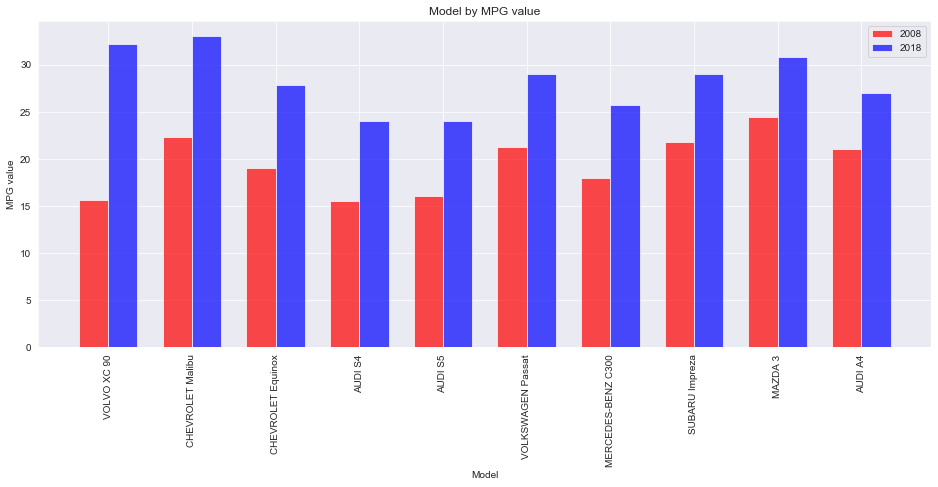

In [120]:
width = 0.35
plt.figure(figsize = (16,6))

plt.bar(x, p, width, color = 'r' ,alpha = 0.7, label = '2008')
plt.bar(x + width, q, width, color = 'b',alpha = 0.7, label = '2018')          
#title and labels
plt.ylabel('MPG value')
plt.xlabel('Model')
plt.title('Model by MPG value')
locations = x + width / 2  # xtick locations
labels = ['VOLVO XC 90' ,'CHEVROLET Malibu' ,'CHEVROLET Equinox' ,'AUDI S4'  ,'AUDI S5' ,'VOLKSWAGEN Passat' ,'MERCEDES-BENZ C300' ,'SUBARU Impreza' ,'MAZDA 3' ,'AUDI A4'   ]  # xtick labels
plt.xticks(locations, labels, rotation = 90)
sns.set_style('darkgrid')
# legend
plt.legend()


In [ ]:
VOLVO XC 90 ,CHEVROLET Malibu ,CHEVROLET Equinox ,AUDI S4  ,AUDI S5 ,VOLKSWAGEN Passat ,MERCEDES-BENZ C300 ,SUBARU Impreza ,MAZDA 3 ,AUDI A4   